In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from scipy import stats
import re

# Read in data

In [2]:
products = pd.read_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/products_train.csv')
sessions = pd.read_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_train.csv')

In [3]:
products.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [4]:
sessions.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


# Data Cleaning-Products

## Drop author

In [5]:
products = products.drop('author', axis=1)
products.head()

,id,locale,title,price,brand,color,size,model,material,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,Inhalt: 1 Stück


## Filter UK

In [63]:
products_uk = products.loc[products['locale']=='UK'].drop('locale',axis=1)
products_uk.head()

,id,title,price,brand,color,size,model,material,desc
913336,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,NaN,100% Polyester,COLOR: The sherpa throw blanket is available i...
913337,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,Competitively priced
913338,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,NaN,NaN,NaN,NaN
913339,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,NaN,FBA-sealer-black,Acrylonitrile Butadiene Styrene,【AFTER-SALE】This handheld food heat sealer sho...
913340,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,NaN,NaN,Alloy Steel,🔐【 Anti-Friction & Customer First】Each box of ...


In [64]:
products_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500180 entries, 913336 to 1413515
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        500180 non-null  object 
 1   title     500180 non-null  object 
 2   price     500180 non-null  float64
 3   brand     495898 non-null  object 
 4   color     378078 non-null  object 
 5   size      301092 non-null  object 
 6   model     243528 non-null  object 
 7   material  298955 non-null  object 
 8   desc      460922 non-null  object 
dtypes: float64(1), object(8)
memory usage: 38.2+ MB


## Filter out 'crazy' price

In [65]:
max_price = max(products_uk['price'])
num_max_price = len(products_uk[products_uk['price'] == max(products_uk['price'])])

print(f'The max price for UK products: {max_price}')
print(f'The number of products with this max price: {num_max_price}')

The max price for UK products: 40000000.07
The number of products with this max price: 25280


In [58]:
# products_uk = products_uk.loc[products_uk['price'] < 500]
# products_uk.shape

(473662, 9)

In [59]:
products_uk['title'].value_counts()

title
Peppa Pig                                                                                                                                                                                                   57
Flight Knight Lightweight 4 Wheel ABS Hard Case Suitcases Cabin & Hold Luggage Options Approved For Over 100 Airlines Including easyJet, British Airways, RyanAir, Virgin Atlantic, Emirates & Many More    52
Non-slip Household Floor Socks Knit Sweater Casual Socks Slippers Socks for Women                                                                                                                           30
Blanket with Sleeves, Wearable Blanket Adult,Oversized Blanket Hoodie for Women and Men, Shu Velveteen Hooded Sweatshirt with Giant Pocket                                                                  28
Poseca Dog Clothes for Small Dogs Dog Coat Waterproof Winter Jacket Warm Vest Dog Clothes Dog Coat Warm Winter Dog Jacket with Dog Harness for Small Medium Large Dogs

In [60]:
products_uk['price'].value_counts()

price
9.99      18967
8.99      14592
7.99      13291
12.99     13140
6.99      12974
          ...  
157.50        1
67.66         1
110.62        1
243.66        1
273.72        1
Name: count, Length: 10660, dtype: int64

In [62]:
products_uk['brand'].value_counts()

brand
Generic                    2145
L'Oreal                    1463
Amazon Basics              1306
LEGO                       1188
Independently published    1160
                           ... 
SK SYUKUYU                    1
Zheng Feng                    1
Scrubeze                      1
Seggiano                      1
CRYSTALS                      1
Name: count, Length: 74046, dtype: int64

# Data Cleaning-Sessions

## Filter UK

In [66]:
sessions_uk = sessions.loc[sessions['locale']=='UK']
sessions_uk.head()

,prev_items,next_item,locale
2090535,['B0BFDL54Y7' 'B0BFDR9X13' 'B07J4WF8VH' 'B07Y2...,B07Y227WNJ,UK
2090536,['B07FM2GLNQ' 'B07GZW3P4W'],B095NNZCR6,UK
2090537,['B0021L95HU' 'B07DDL77RY' 'B07DDL77RY'],B002KA1FZC,UK
2090538,['B0B2WSZYL2' 'B000I8XZ7O'],B000I90TAO,UK
2090539,['B00LW1APOC' 'B00LW1APOC' 'B00OI6NQUI' 'B09HL...,B07H54NZ3K,UK


In [67]:
sessions_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182181 entries, 2090535 to 3272715
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   prev_items  1182181 non-null  object
 1   next_item   1182181 non-null  object
 2   locale      1182181 non-null  object
dtypes: object(3)
memory usage: 36.1+ MB


## Seperate prev_items

In [10]:
prev_items_sep = list(map(lambda row: row.strip('[]').split(), sessions_uk['prev_items']))
sessions_uk['prev_items_sep'] = prev_items_sep
sessions_uk.head()

<ipython-input-10-f3a1a3be048e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_uk['prev_items_sep'] = prev_items_sep


,prev_items,next_item,locale,prev_items_sep
2090535,['B0BFDL54Y7' 'B0BFDR9X13' 'B07J4WF8VH' 'B07Y2...,B07Y227WNJ,UK,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0..."
2090536,['B07FM2GLNQ' 'B07GZW3P4W'],B095NNZCR6,UK,"['B07FM2GLNQ', 'B07GZW3P4W']"
2090537,['B0021L95HU' 'B07DDL77RY' 'B07DDL77RY'],B002KA1FZC,UK,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']"
2090538,['B0B2WSZYL2' 'B000I8XZ7O'],B000I90TAO,UK,"['B0B2WSZYL2', 'B000I8XZ7O']"
2090539,['B00LW1APOC' 'B00LW1APOC' 'B00OI6NQUI' 'B09HL...,B07H54NZ3K,UK,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0..."


In [11]:
sessions_uk_sep = sessions_uk[['prev_items_sep','next_item']]
sessions_uk_sep.head()

,prev_items_sep,next_item
2090535,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ
2090536,"['B07FM2GLNQ', 'B07GZW3P4W']",B095NNZCR6
2090537,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC
2090538,"['B0B2WSZYL2', 'B000I8XZ7O']",B000I90TAO
2090539,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K


In [12]:
sessions_uk_sep.shape

(1182181, 2)

# Feature Engineering-Sessions

## Create column prev_items_len

In [13]:
prev_len = list(map(lambda row: len(row), sessions_uk_sep['prev_items_sep']))
sessions_uk_sep['prev_items_len'] = prev_len
sessions_uk_sep.head()

<ipython-input-13-8e4559887edf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_uk_sep['prev_items_len'] = prev_len


,prev_items_sep,next_item,prev_items_len
2090535,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ,4
2090536,"['B07FM2GLNQ', 'B07GZW3P4W']",B095NNZCR6,2
2090537,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC,3
2090538,"['B0B2WSZYL2', 'B000I8XZ7O']",B000I90TAO,2
2090539,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K,4


In [14]:
prev_items_counts = sessions_uk_sep['prev_items_len'].value_counts()
prev_items_counts

# We might want to think about:
# 1. whether the sessions that has really long prev_items are worth to consider
#    If we want to plot them, the graph will be really 'long' if we consider one
#    session as a whole.
#    If we only consider the previous item and the next item, this will not be a
#    a problem.

prev_items_len
2     449320
3     248849
4     152794
5      97431
6      65199
       ...  
95         1
88         1
75         1
77         1
66         1
Name: count, Length: 79, dtype: int64

In [15]:
prev_items_counts.index # max 201

Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  34,  33,  36,  35,  37,  39,  38,  40,  41,  43,  42,
        44,  45,  53,  46,  47,  49,  48,  52,  51,  50,  56,  57,  59,  55,
        60,  54,  79,  62,  71,  58,  76,  84,  73,  78,  68, 109,  67, 201,
        89,  99,  72,  63,  95,  88,  75,  77,  66],
      dtype='int64', name='prev_items_len')

## *Seperate prev_item into prev and next

In [16]:
sessions_uk_new = sessions_uk_sep.reset_index()[['prev_items_sep','next_item']]
sessions_uk_new.head()

,prev_items_sep,next_item
0,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ
1,"['B07FM2GLNQ', 'B07GZW3P4W']",B095NNZCR6
2,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC
3,"['B0B2WSZYL2', 'B000I8XZ7O']",B000I90TAO
4,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K


In [17]:
sessions_uk_new['prev_items_sep'][0]

["'B0BFDL54Y7'", "'B0BFDR9X13'", "'B07J4WF8VH'", "'B07Y21LDJX'"]

In [18]:
# add next_item to prev_items_sep

def append_string_to_list(row):
    return row['prev_items_sep'] + [row['next_item']]

# Apply the function to each row using apply and axis=1
sessions_uk_new['all_items'] = sessions_uk_new.apply(append_string_to_list, axis=1)

In [19]:
sessions_uk_new['all_items'][0]

["'B0BFDL54Y7'", "'B0BFDR9X13'", "'B07J4WF8VH'", "'B07Y21LDJX'", 'B07Y227WNJ']

In [20]:
# clean extra quotation marks

test = list(map(lambda row: [i.replace("'", "") for i in row], sessions_uk_new['all_items']))

In [21]:
test[0]

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX', 'B07Y227WNJ']

In [22]:
sessions_uk_new['all_items'] = test
sessions_uk_new.head()

,prev_items_sep,next_item,all_items
0,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ..."
1,"['B07FM2GLNQ', 'B07GZW3P4W']",B095NNZCR6,"[B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]"
2,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC,"[B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]"
3,"['B0B2WSZYL2', 'B000I8XZ7O']",B000I90TAO,"[B0B2WSZYL2, B000I8XZ7O, B000I90TAO]"
4,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W..."


In [23]:
all_items_session = sessions_uk_new['all_items']

In [24]:
all_items_session

0          [B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ...
1                       [B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]
2           [B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]
3                       [B0B2WSZYL2, B000I8XZ7O, B000I90TAO]
4          [B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W...
                                 ...                        
1182176    [B06XK89969, B01NGT5NF4, B00D5Z89C8, B07ZVGCHR...
1182177    [B076M85W1K, B07L8792Q9, B095RW318L, B095RVVX9...
1182178                 [B00JQDIQRQ, B001O59QQE, B088M5YT6Y]
1182179                 [B07QMHMLJZ, B07FPYYMC4, B07PFF814D]
1182180                 [B06XC9TW57, B08WYQ4S11, B08WZ4CSRQ]
Name: all_items, Length: 1182181, dtype: object

In [25]:
sessions_uk_new['prev_next_session'] = list(map(lambda row: [[row[i],row[i+1]] for i in range(len(row)-1)], sessions_uk_new['all_items']))

In [26]:
sessions_uk_new.head()

,prev_items_sep,next_item,all_items,prev_next_session
0,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ...","[[B0BFDL54Y7, B0BFDR9X13], [B0BFDR9X13, B07J4W..."
1,"['B07FM2GLNQ', 'B07GZW3P4W']",B095NNZCR6,"[B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]","[[B07FM2GLNQ, B07GZW3P4W], [B07GZW3P4W, B095NN..."
2,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC,"[B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]","[[B0021L95HU, B07DDL77RY], [B07DDL77RY, B07DDL..."
3,"['B0B2WSZYL2', 'B000I8XZ7O']",B000I90TAO,"[B0B2WSZYL2, B000I8XZ7O, B000I90TAO]","[[B0B2WSZYL2, B000I8XZ7O], [B000I8XZ7O, B000I9..."
4,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W...","[[B00LW1APOC, B00LW1APOC], [B00LW1APOC, B00OI6..."


In [27]:
sessions_uk_new['prev_next_session'][0]

[['B0BFDL54Y7', 'B0BFDR9X13'],
 ['B0BFDR9X13', 'B07J4WF8VH'],
 ['B07J4WF8VH', 'B07Y21LDJX'],
 ['B07Y21LDJX', 'B07Y227WNJ']]

In [28]:
session_pair = sessions_uk_new['prev_next_session']

In [29]:
final_session_pair = [pair for i in session_pair for pair in i]

In [30]:
final_session_pair[:5]

[['B0BFDL54Y7', 'B0BFDR9X13'],
 ['B0BFDR9X13', 'B07J4WF8VH'],
 ['B07J4WF8VH', 'B07Y21LDJX'],
 ['B07Y21LDJX', 'B07Y227WNJ'],
 ['B07FM2GLNQ', 'B07GZW3P4W']]

In [31]:
item_list = list(set([item for pair in final_session_pair for item in pair]))

In [42]:
len(item_list)

494409

In [32]:
prev_product = pd.Series([pair[0] for pair in final_session_pair], name='prev')
next_product = pd.Series([pair[1] for pair in final_session_pair], name='next')

In [33]:
final_prev_next = pd.concat([prev_product, next_product],axis=1)
final_prev_next.head()

,prev,next
0,B0BFDL54Y7,B0BFDR9X13
1,B0BFDR9X13,B07J4WF8VH
2,B07J4WF8VH,B07Y21LDJX
3,B07Y21LDJX,B07Y227WNJ
4,B07FM2GLNQ,B07GZW3P4W


In [34]:
prev_next_edge = final_prev_next.groupby(['prev','next']).size().reset_index(name='Count')
prev_next_edge.head()

,prev,next,Count
0,0001821946,0008326045,2
1,000647988X,0007428545,2
2,000647988X,0007448031,1
3,000647988X,B005CB5HTG,1
4,000647988X,B016IPVNDS,1


In [36]:
prev_next_edge["Count"].value_counts()

Count
1      2353913
2       249810
3        92861
4        47665
5        27938
        ...   
290          1
229          1
173          1
342          1
188          1
Name: count, Length: 281, dtype: int64

In [43]:
len(prev_next_edge[prev_next_edge["Count"] >= 3])

261534

In [ ]:
< 5

In [62]:
prev_next_edge.shape

(2865257, 3)

In [60]:
sum(prev_next_edge['Count'])

4872506

In [61]:
final_prev_next.shape

(4872506, 2)

# DiGraph

In [43]:
G = nx.DiGraph()

In [63]:
for _, edge in prev_next_edge.iterrows():
    G.add_edge(edge['prev'], edge['next'], weight=edge['Count'])

In [66]:
adj_mat = nx.adjacency_matrix(G)

# *Problem

If we already trained our model, when we predict, could we

# *Ideas

1. Baseline model 1: only use feature
2. Baseline model 2: only use graph
3. Next step model: simply concate feature & graph
4. Next step model: implement graph into feature
5. Next step model: implement feature into graph
6. Next step model: for each session

* pseudo-label: clustering => classification


In [44]:
for item in item_list:
    G.add_node(item)

In [45]:
# nx.draw(G)

In [47]:
for i in range(len(final_session_pair)):
    for item1, item2 in final_session_pair:
        if G.has_edge(item1, item2):
            G[item1][item2]["weight"] += 1
        else:
            G.add_edge(item1, item2, weight=1)

KeyboardInterrupt: 

In [ ]:
# nx.draw(G)

# Code Dump

In [120]:
# for i in range(50):#len(sessions_uk_new)):
#     print(sessions_uk_new.loc[i,"next_item"])
#     print(sessions_uk_new.loc[i,"all_items"])
#     if sessions_uk_new.loc[i,"next_item"] in sessions_uk_new.loc[i,"all_items"]:
#         print(i)

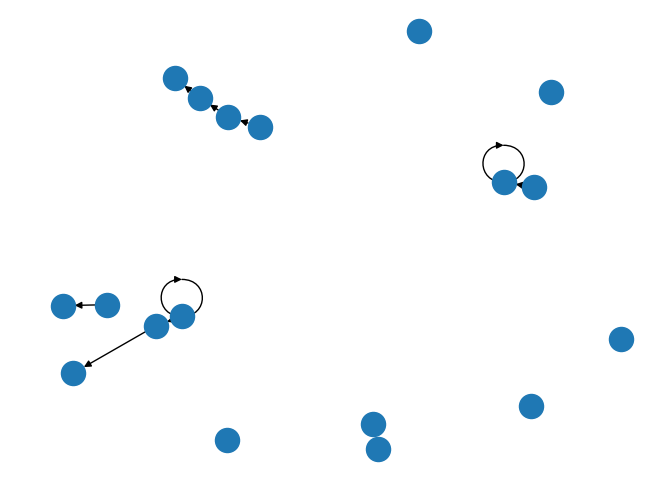

In [152]:
nx.draw(G)

In [151]:
# test = sessions_uk_new[0:5]
# test

# products = []
# for i in range(len(test)):
#     for item in test.loc[i, "all_items"]:
#         if item not in products:
#             products.append(item)
#     next = test.loc[i, "next_item"]
#     if next not in products:
#         products.append(next)

# products

# for item in products:
#     G.add_node(item)

# for i in range(len(test)):
#     for item1, item2 in test.loc[i, "prev_next_session"]:
#         if G.has_edge(item1, item2):
#             G[item1][item2]["weight"] += 1
#         else:
#             G.add_edge(item1, item2, weight=1)

# for i in test['prev_next_session']:
#     for j in i:
#         G.add_edge(i)